<a href="https://colab.research.google.com/github/masdimaseka/expression-detection/blob/main/expresion_detection_augmanted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/dataset-colab/dataset_ekspresi.zip" -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/sad/Training_65242339.jpg  
  inflating: dataset/train/sad/Training_65267116.jpg  
  inflating: dataset/train/sad/Training_65275626.jpg  
  inflating: dataset/train/sad/Training_6529266.jpg  
  inflating: dataset/train/sad/Training_65329617.jpg  
  inflating: dataset/train/sad/Training_65338712.jpg  
  inflating: dataset/train/sad/Training_65338797.jpg  
  inflating: dataset/train/sad/Training_65387162.jpg  
  inflating: dataset/train/sad/Training_65404494.jpg  
  inflating: dataset/train/sad/Training_65426218.jpg  
  inflating: dataset/train/sad/Training_65430136.jpg  
  inflating: dataset/train/sad/Training_65437377.jpg  
  inflating: dataset/train/sad/Training_6545735.jpg  
  inflating: dataset/train/sad/Training_65463385.jpg  
  inflating: dataset/train/sad/Training_65473985.jpg  
  inflating: dataset/train/sad/Training_65502829.jpg  
  inflating: dataset/train/sad/Training_65505359.jpg  
  inflating: dat

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = 'dataset/train'
val_dir = 'dataset/test'

batch_size = 64
num_epoch = 50

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
num_train = 28709
num_val = 7178

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

model_info = model.fit(
    train_generator,
    steps_per_epoch=num_train // batch_size,
    epochs=num_epoch,
    validation_data=validation_generator,
    validation_steps=num_val // batch_size)


Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 33s 63ms/step - accuracy: 0.2445 - loss: 1.8317 - val_accuracy: 0.2589 - val_loss: 1.8102
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2656 - loss: 1.7803 - val_accuracy: 0.2573 - val_loss: 1.8093
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.2632 - loss: 1.7799 - val_accuracy: 0.3277 - val_loss: 1.7130
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4531 - loss: 1.6441 - val_accuracy: 0.3283 - val_loss: 1.7121
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 64s 57ms/step - accuracy: 0.2973 - loss: 1.7318 - val_accuracy: 0.3704 - val_loss: 1.6464
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3125 - loss: 1.6768 - val_accuracy: 0.3714 - val_loss: 1.6430
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.3208 - loss: 1.6921 - val_accuracy: 0.4001 - val_loss: 1.5697
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3438 - loss: 1.6095 - val_accu

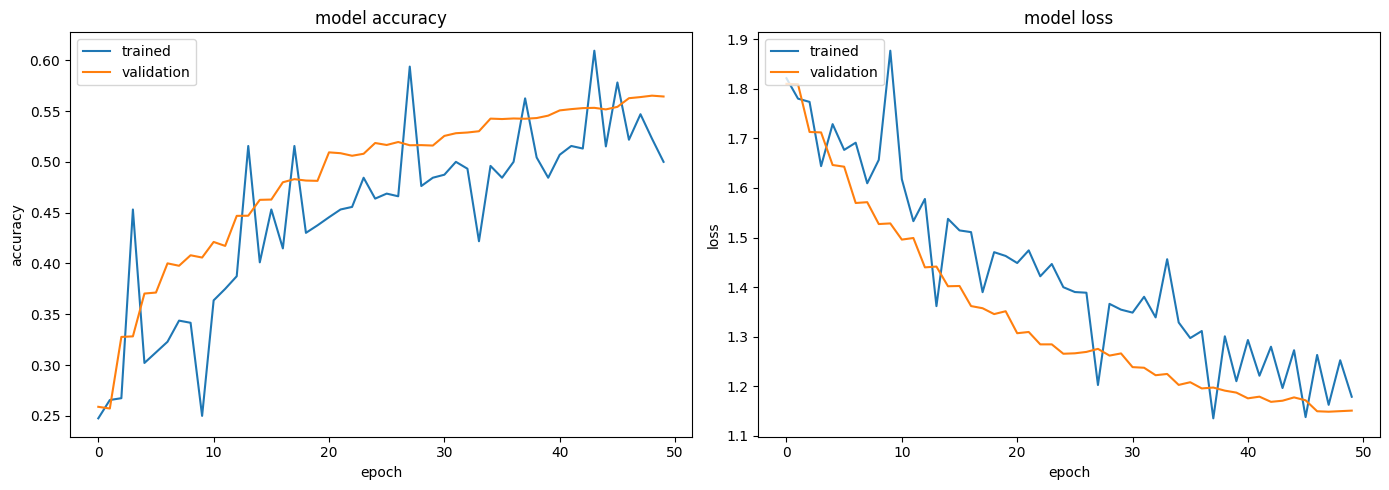

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title('model accuracy')
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['trained', 'validation' ], loc='upper left')

plt.subplot(1, 2, 2)
plt.title('model loss')
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['trained', 'validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.save('model-deteksi-ekspresi-augmented.h5')